In [1]:
#check stzbility for the atmosphere inner-outer envelope

#commit changes to fork 
# sync forks

#create main branch
# and second branch 

In [7]:
import logging

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import LogNorm

from scipy.interpolate import interp1d
import os

from matplotlib.ticker import ScalarFormatter

formatter = ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
formatter.set_useOffset(False)
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

import numpy as np
import optimistix as optx
from atmodeller import (
    InteriorAtmosphere,
    Planet,
    Species,
    SpeciesCollection,
    debug_logger,
    earth_oceans_to_hydrogen_mass,
    SolverParameters,
)
from atmodeller.eos import get_eos_models
from atmodeller.solubility import get_solubility_models
from atmodeller.thermodata import IronWustiteBuffer



logger = debug_logger() #you can dump it in file 
logger.setLevel(logging.INFO) #you could set it to error

# For more output use DEBUG
# logger.setLevel(logging.DEBUG)

#you can enhance it from 10 to 20 

ImportError: cannot import name 'InteriorAtmosphere' from 'atmodeller' (/home/mathias/atmodeller/atmodeller/__init__.py)

In [3]:
R_uranus = 2.5388e7 #meters
M_earth = 5.972e24 #kg
M_uranus = 14.536*M_earth

boundary_mass = 0.913*M_uranus 
boundary_radius = 0.772*R_uranus
boundary_temperature = 2338.8
M_uranus_core = 0.61*M_earth 
#boundary_core_mass_fraction = M_uranus_core/boundary_mass
#bounddary_core_mass_fraction: float = boundary_core_mass_fraction
#mantle_melt_fraction = 1.0

boundary_core_mass_fraction = 0
mantle_melt_fraction = 0

Z_1 = 0.17
Z_2 = 0.915
Z_solar = 0.0142
RANDOM_SEED = 0

np.random.seed(RANDOM_SEED)

In [4]:
H_masspercent_lodders09: float = 73.9
He_masspercent_lodders09: float = 24.69
C_masspercent_lodders09: float = 0.22
N_masspercent_lodders09: float = 0.07
O_masspercent_lodders09: float = 0.63
Si_masspercent_lodders09: float = 0.07
Mg_masspercent_lodders09: float = 0.06

H_logN: float = 12
He_logN: float = 10.93
C_logN: float = 8.39
N_logN: float = 7.86
O_logN: float = 8.73
Si_logN: float = 7.53
Mg_logN: float = 7.54 

In [4]:
#SiO2 for primitive composition of Earth
SiO2_mantlemasspercent_palme14: float = 45.4
total_mantlemasspercent_palme14: float = 98.41
Si_massfraction_palme14: float = round(
    SiO2_mantlemasspercent_palme14
    / total_mantlemasspercent_palme14
    * (1 - boundary_core_mass_fraction)
    / (28.0855 + 2 * 15.999)
    * 28.0855,
    3,
)

O_massfraction_palme141: float = Si_massfraction_palme14 / 28.0855 * 2 * 15.999

MgO_mantlemasspercent_palme14: float = 36.77
Mg_massfraction_palme14: float = round(
    MgO_mantlemasspercent_palme14
    / total_mantlemasspercent_palme14
    * (1 - boundary_core_mass_fraction)
    / (24.305 + 15.999)
    * 24.305,
    3,
)

O_massfraction_palme142: float = Si_massfraction_palme14 / 24.305 * 15.999
O_massfraction_palme14 = O_massfraction_palme141 + O_massfraction_palme142

In [6]:
eos_models = get_eos_models()
sol_models = get_solubility_models()

H2O_g = Species.create_gas("H2O")
H2O_gs = Species.create_gas("H2O", solubility=sol_models["H2O_peridotite_sossi23"])
H2O_rgs = Species.create_gas(
    "H2O",
    activity=eos_models["H2O_cork_holland98"],
    solubility=sol_models["H2O_peridotite_sossi23"],
)

H2_g = Species.create_gas("H2")
H2_gs = Species.create_gas("H2", solubility=sol_models["H2_basalt_hirschmann12"])
H2_rgs = Species.create_gas(
    "H2", activity=eos_models["H2_chabrier21"], solubility=sol_models["H2_basalt_hirschmann12"]
)

O2_g = Species.create_gas("O2")
O2_rg = Species.create_gas("O2", activity=eos_models["O2_cs_shi92"])

OSi_g = Species.create_gas("OSi")
OSi_rg = Species.create_gas("OSi", activity=eos_models["OSi_rk49_connolly16"])

H4Si_g = Species.create_gas("H4Si")
H4Si_rg = Species.create_gas("H4Si", activity=eos_models["H4Si_wang18"])

O2Si_l = Species.create_condensed("O2Si", state="l")
O2Si_bqz = Species.create_condensed("O2Si", state="bqz")

C_cr = Species.create_condensed("C", state="cr")

CO2_g = Species.create_gas("CO2")
CO2_gs = Species.create_gas("CO2", solubility=sol_models["CO2_basalt_dixon95"])
CO2_rgs = Species.create_gas(
    "CO2", solubility=sol_models["CO2_basalt_dixon95"], activity=eos_models["CO2_cs_shi92"]
)

CO_g = Species.create_gas("CO")
CO_gs = Species.create_gas("CO", solubility=sol_models["CO_basalt_yoshioka19"])
CO_rgs = Species.create_gas(
    "CO", solubility=sol_models["CO_basalt_yoshioka19"], activity=eos_models["CO_cs_shi92"]
)

CH4_g = Species.create_gas("CH4")
CH4_gs = Species.create_gas("CH4", solubility=sol_models["CH4_basalt_ardia13"])
CH4_rgs = Species.create_gas(
    "CH4", solubility=sol_models["CH4_basalt_ardia13"], activity=eos_models["CH4_cs_shi92"]
)

N2_g = Species.create_gas("N2")
N2_gs = Species.create_gas("N2", solubility=sol_models["N2_basalt_libourel03"])
N2_rgs = Species.create_gas(
    "N2", solubility=sol_models["N2_basalt_libourel03"], activity=eos_models["N2_cs_saxena87"]
)

NH3_g = Species.create_gas("NH3")
NH3_rg = Species.create_gas("H3N", activity=eos_models["H3N_rk49_reid87"])

He_g = Species.create_gas("He")
He_gs = Species.create_gas("He", solubility=sol_models["He_basalt_jambon86"])
He_rgs = Species.create_gas(
    "He", solubility=sol_models["He_basalt_jambon86"], activity=eos_models["He_chabrier21"]
)

Mg_g = Species.create_gas("Mg")
#Mg_gs = Species.create_gas("He", solubility=sol_models["He_basalt_jambon86"])
#Mg_rgs = Species.create_gas(
#    "He", solubility=sol_models["He_basalt_jambon86"], activity=eos_models["He_chabrier21"]
#)

MgO_l = Species.create_condensed("MgO", state="l")
MgO_cr = Species.create_condensed("MgO", state="cr")
MgH_g = Species.create_gas("MgH")
MgOH_g = Species.create_gas("MgOH")

species_HHeCNOSi_magma_nosol_ideal = SpeciesCollection(
    (H2O_g, H2_g, O2_g, OSi_g, H4Si_g, O2Si_l, C_cr, CO2_g, CO_g, CH4_g, N2_g, NH3_g, He_g, Mg_g, MgO_l, MgH_g, MgOH_g)
)
species_HHeCNOSi_magma_sol_ideal = SpeciesCollection(
    (H2O_gs, H2_gs, O2_g, OSi_g, H4Si_g, O2Si_l, C_cr, CO2_gs, CO_gs, CH4_gs, N2_gs, NH3_g, He_gs, Mg_g, MgO_l, MgH_g, MgOH_g)
)
species_HHeCNOSi_magma_sol_real = SpeciesCollection(
    (
        H2O_rgs,
        H2_rgs,
        O2_rg,
        OSi_rg,
        H4Si_rg,
        O2Si_l,
        C_cr,
        CO2_rgs,
        CO_rgs,
        CH4_rgs,
        N2_rgs,
        NH3_rg,
        He_rgs,
        Mg_g, 
        MgO_l,
        MgH_g,
        MgOH_g
    )
)
#MgH Magnesium Hydride
#MgOH Magnesium Hydroxide -> ideal gas law 
#Plot condensed moles for example for Silicon
#mass balance, take mass constraints, take atmospheric mass/moles+ take condensed mass/moles + take dissolved mass/moles
#plot envelope mass fraction, envelope mass/planet mass, Helled, what do they call the volatile layer. 
#temperature-pressure profile at 1 Myr or 10 Myr
#Ravit Helled 2011-2013

In [12]:
T_resolution = 10
H_resolution = 10
#flatten look for numpy mesh, all condensates seperately
temperature = np.repeat(np.linspace(2200, 3200, T_resolution, endpoint=False), H_resolution)
temperature = temperature.flatten()
hmps = np.tile(np.logspace(-1, 0.8, num=H_resolution), int(np.ceil(T_resolution)))[:T_resolution*H_resolution]
hmps = hmps.flatten()

metall = 30

In [7]:
T_resolution = 10
H_resolution = 10
#flatten look for numpy mesh, all condensates seperately
temperature = np.repeat(np.linspace(2200, 3200, T_resolution, endpoint=False), H_resolution)
temperature = temperature.flatten()
hmps = np.tile(np.logspace(-1, 0.8, num=H_resolution), int(np.ceil(T_resolution)))[:T_resolution*H_resolution]
hmps = hmps.flatten()

metall = 100
h_kgs = hmps / 100 * boundary_mass
si_kg_magma: float = Si_massfraction_palme14 * boundary_mass
mg_kg_magma: float = Mg_massfraction_palme14 * boundary_mass
o_kg_magma: float = O_massfraction_palme14 * boundary_mass

# Lodders et al. (2009) Springer book chapter Table 8
si_kgs_solar = h_kgs * Si_masspercent_lodders09 / H_masspercent_lodders09
mg_kgs_solar = h_kgs * Mg_masspercent_lodders09 / H_masspercent_lodders09
o_kgs_solar = h_kgs * O_masspercent_lodders09 / H_masspercent_lodders09
c_kgs_solar = h_kgs * C_masspercent_lodders09 / H_masspercent_lodders09
n_kgs_solar = h_kgs * N_masspercent_lodders09 / H_masspercent_lodders09
he_kgs_solar = h_kgs * He_masspercent_lodders09 / H_masspercent_lodders09
print(mantle_melt_fraction * si_kg_magma)
mass_constraints = {
    "H": h_kgs,
    "He": he_kgs_solar,
    "C": metall * c_kgs_solar,
    "N": metall * n_kgs_solar,
    "Si": metall * si_kgs_solar + mantle_melt_fraction * si_kg_magma,
    "O": metall * o_kgs_solar + mantle_melt_fraction * o_kg_magma,
    "Mg": metall * mg_kgs_solar + mantle_melt_fraction * mg_kg_magma,
        }
solver_parameters = SolverParameters(multistart= 0)#, max_steps = 1000)
Uranus = Planet(
    surface_temperature=temperature,
    planet_mass=boundary_mass,
    mantle_melt_fraction=mantle_melt_fraction,
    surface_radius=boundary_radius,
    core_mass_fraction=boundary_core_mass_fraction,
    )

model_magma_nosol_ideal = InteriorAtmosphere(species_HHeCNOSi_magma_nosol_ideal)
model_magma_nosol_ideal.solve(
        planet=Uranus,
        mass_constraints=mass_constraints,
         )
output_magma_nosol_ideal = model_magma_nosol_ideal.output
output_magma_nosol_ideal.quick_look()
output_magma_nosol_ideal.to_excel("HHeCNOSi_magma_nosol_ideal")

model_magma_sol_ideal = InteriorAtmosphere(species_HHeCNOSi_magma_sol_ideal)
initial_log_number_density = output_magma_nosol_ideal.log_number_density
model_magma_sol_ideal.solve(
        planet=Uranus,
        mass_constraints=mass_constraints,
        initial_log_number_density=initial_log_number_density,
        )
output_magma_sol_ideal = model_magma_sol_ideal.output
output_magma_sol_ideal.quick_look()
output_magma_sol_ideal.to_excel("HHeCNOSi_magma_sol_ideal")

#last minute solution, reverting to other solver 
model_magma_sol_real = InteriorAtmosphere(species_HHeCNOSi_magma_sol_real)
initial_log_number_density = output_magma_sol_ideal.log_number_density
model_magma_sol_real.solve(
        planet=Uranus,
        mass_constraints=mass_constraints,
        solver_parameters= solver_parameters,
        initial_log_number_density=initial_log_number_density, #this does not need to be defined, pressures really high, taking away from ideal gas values
        )
output_magma_sol_real = model_magma_sol_real.output
output_magma_sol_real.quick_look()
output_magma_sol_real.to_excel("./excelfiles/HHeCNOSi_magma_sol_real_metall100")


[18:27:50 - atmodeller.classes             - INFO     ] - species = ('H2O_g: IdealGas, NoSolubility', 'H2_g: IdealGas, NoSolubility', 'O2_g: IdealGas, NoSolubility', 'OSi_g: IdealGas, NoSolubility', 'H4Si_g: IdealGas, NoSolubility', 'O2Si_l: CondensateActivity, NoSolubility', 'C_cr: CondensateActivity, NoSolubility', 'CO2_g: IdealGas, NoSolubility', 'CO_g: IdealGas, NoSolubility', 'CH4_g: IdealGas, NoSolubility', 'N2_g: IdealGas, NoSolubility', 'H3N_g: IdealGas, NoSolubility', 'He_g: IdealGas, NoSolubility', 'Mg_g: IdealGas, NoSolubility', 'MgO_l: CondensateActivity, NoSolubility', 'HMg_g: IdealGas, NoSolubility', 'HMgO_g: IdealGas, NoSolubility')
[18:27:50 - atmodeller.classes             - INFO     ] - reactions = {0: '2.0 H2O_g + 1.0 C_cr = 2.0 H2_g + 1.0 CO2_g',
 1: '1.0 H2O_g + 1.0 C_cr = 1.0 H2_g + 1.0 CO_g',
 2: '2.0 H2_g + 1.0 C_cr = 1.0 CH4_g',
 3: '4.0 H2_g + 1.0 O2Si_l = 2.0 H2O_g + 1.0 H4Si_g',
 4: '1.5 H2_g + 0.5 N2_g = 1.0 H3N_g',
 5: '2.0 H2O_g = 2.0 H2_g + 1.0 O2_g',
 6

0.0


[18:27:57 - atmodeller.classes             - INFO     ] - Solve complete: 100 (100.00%) successful model(s)
[18:27:57 - atmodeller.classes             - INFO     ] - Solver steps (max) = 99
[18:27:58 - atmodeller.output              - INFO     ] - Writing output to excel
[18:27:58 - atmodeller.output              - INFO     ] - Computing to_dataframes output
[18:27:58 - atmodeller.output              - INFO     ] - Computing asdict output
[18:28:04 - atmodeller.output              - INFO     ] - Output written to HHeCNOSi_magma_nosol_ideal.xlsx
[18:28:04 - atmodeller.classes             - INFO     ] - species = ('H2O_g: IdealGas, SolubilityPowerLaw', 'H2_g: IdealGas, SolubilityPowerLawLog10', 'O2_g: IdealGas, NoSolubility', 'OSi_g: IdealGas, NoSolubility', 'H4Si_g: IdealGas, NoSolubility', 'O2Si_l: CondensateActivity, NoSolubility', 'C_cr: CondensateActivity, NoSolubility', 'CO2_g: IdealGas, _CO2_basalt_dixon95', 'CO_g: IdealGas, _CO_basalt_yoshioka19', 'CH4_g: IdealGas, _CH4_basalt_ar

In [8]:
color_tot = "black"
color_H2 = "orange"
color_H2O = "blue"
color_SiH4 = "red"
color_SiO = "brown"
color_O2 = "limegreen"
color_CO2 = "cyan"
color_CO = "magenta"
color_CH4 = "purple"
color_N2 = "green"
color_NH3 = "pink"
color_MgO = "darkred"
color_He = "gray"
color_H = "orange"
color_C = "cyan"
color_N = "green"
color_O = "blue"
color_Si = "red"
color_Mg = "lime"
color_MgH2 = "gold"
color_MgH = "teal"
color_MgOH = "indigo"
color_Ccr = "dimgray"

In [10]:
filename = "./excelfiles/HHeCNOSi_magma_sol_real_metall30.xlsx"

H2_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="H2_g")["pressure"]
H2O_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="H2O_g")["pressure"]
O2_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="O2_g")["pressure"]
SiH4_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="H4Si_g")["pressure"]
SiO_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="OSi_g")["pressure"]
CO2_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="CO2_g")["pressure"]
CO_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="CO_g")["pressure"]
CH4_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="CH4_g")["pressure"]
N2_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="N2_g")["pressure"]
NH3_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="H3N_g")["pressure"]
He_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="He_g")["pressure"]
Mg_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="Mg_g")["pressure"]
MgOH_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="HMgO_g")["pressure"]
MgH_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="HMg_g")["pressure"]
tot_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="atmosphere")["pressure"]

H_moles_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_H")["atmosphere_moles"]
O_moles_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_O")["atmosphere_moles"]
Si_moles_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_Si")["atmosphere_moles"]
C_moles_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_C")["atmosphere_moles"]
He_moles_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_He")["atmosphere_moles"]
N_moles_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_N")["atmosphere_moles"]
Mg_moles_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_Mg")["atmosphere_moles"]

H_mass_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_H")["atmosphere_mass"]
O_mass_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_O")["atmosphere_mass"]
Si_mass_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_Si")["atmosphere_mass"]
C_mass_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_C")["atmosphere_mass"]
He_mass_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_He")["atmosphere_mass"]
N_mass_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_N")["atmosphere_mass"]
Mg_mass_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_Mg")["atmosphere_mass"]

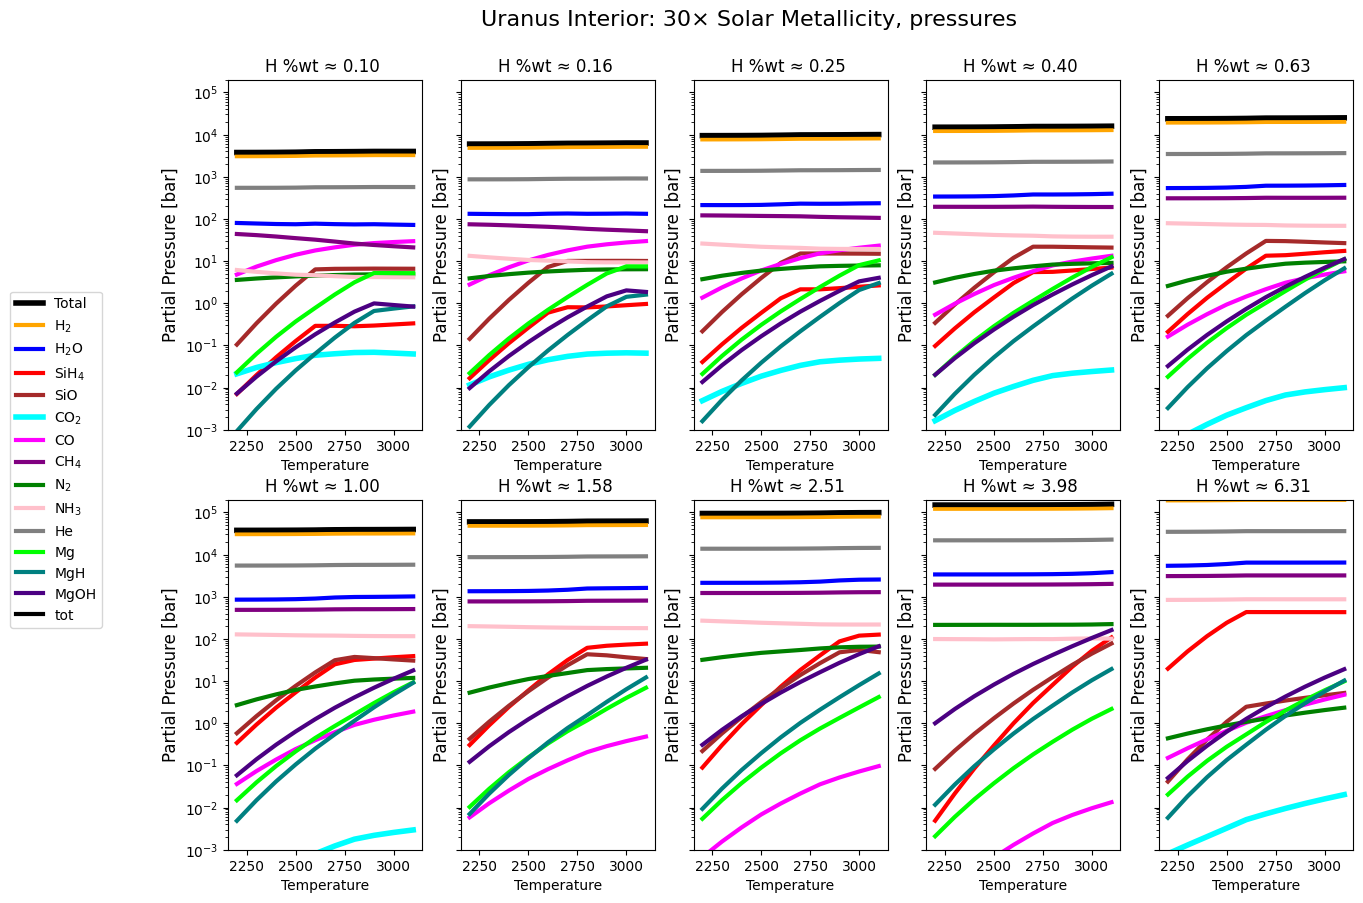

In [13]:
temperature = np.repeat(np.linspace(2200, 3200, T_resolution, endpoint=False), H_resolution)
temperature = temperature.flatten()
hmps = np.tile(np.logspace(-1, 0.8, num=H_resolution), int(np.ceil(T_resolution)))[:T_resolution*H_resolution]
hmps = hmps.flatten()
N = H_resolution
cols = 5
rows = (N + cols - 1) // cols


fig_big, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), sharey='row')
axes = axes.flatten()
legend_handles = None
legend_labels = None

for i in range(H_resolution):
    indices = np.arange(T_resolution)
    values = i + indices * H_resolution
    values = np.array(values)
    Hwt = hmps[i]

    fig, ax = plt.subplots(1, 1, figsize=(15, 20))

    ax.plot(temperature[values], tot_pressure_magma_sol_real[values], color=color_tot, lw=4, ls="-", label="Total")
    ax.plot(temperature[values], H2_pressure_magma_sol_real[values], color=color_H2, lw=3, ls="-", label="H$_2$")
    ax.plot(temperature[values], H2O_pressure_magma_sol_real[values], color=color_H2O, lw=3, ls="-", label="H$_2$O")
    ax.plot(temperature[values], SiH4_pressure_magma_sol_real[values], color=color_SiH4, lw=3, ls="-", label="SiH$_4$")
    ax.plot(temperature[values], SiO_pressure_magma_sol_real[values], color=color_SiO, lw=3, ls="-", label="SiO")
    ax.plot(temperature[values], CO2_pressure_magma_sol_real[values], color=color_CO2, lw=4, ls="-", label="CO$_2$")
    ax.plot(temperature[values], CO_pressure_magma_sol_real[values], color=color_CO, lw=3, ls="-", label="CO")
    ax.plot(temperature[values], CH4_pressure_magma_sol_real[values], color=color_CH4, lw=3, ls="-", label="CH$_4$")
    ax.plot(temperature[values], N2_pressure_magma_sol_real[values], color=color_N2, lw=3, ls="-", label="N$_2$")
    ax.plot(temperature[values], NH3_pressure_magma_sol_real[values], color=color_NH3, lw=3, ls="-", label="NH$_3$")
    ax.plot(temperature[values], He_pressure_magma_sol_real[values], color=color_He, lw=3, ls="-", label="He")
    ax.plot(temperature[values], Mg_pressure_magma_sol_real[values], color=color_Mg, lw=3, ls="-", label="Mg")
    ax.plot(temperature[values], MgH_pressure_magma_sol_real[values], color=color_MgH, lw=3, ls="-", label="MgH")
    ax.plot(temperature[values], MgOH_pressure_magma_sol_real[values], color=color_MgOH, lw=3, ls="-", label="MgOH")
    ax.plot(temperature[values], tot_pressure_magma_sol_real[values], color=color_tot, lw=3, ls="-", label="tot")

    ax.set_title(r"(a) Real gas")
    ax.set_ylim([1e-3, 2e5])
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.set_yscale("log")
    ax.set_xlabel(r"Temperature", fontsize=18)
    ax.set_ylabel(r"Partial Pressure [bar]", fontsize=18)
    ax.get_xaxis().set_major_formatter(ScalarFormatter())

    ax.legend(fontsize=10, loc='best') 
        
    plt.tight_layout()
    title = f"Uranus Interior: 30× Solar Metallicity, H %wt ≈ {Hwt:.2f} "
    filename = f"./excelfiles/uranus_30xperc_{Hwt:.2f}.png"

    plt.title(title)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    #plt.show()
    plt.close(fig)

    axes[i].plot(temperature[values], tot_pressure_magma_sol_real[values], color=color_tot, lw=4, ls="-", label="Total")
    axes[i].plot(temperature[values], H2_pressure_magma_sol_real[values], color=color_H2, lw=3, ls="-", label="H$_2$")
    axes[i].plot(temperature[values], H2O_pressure_magma_sol_real[values], color=color_H2O, lw=3, ls="-", label="H$_2$O")
    axes[i].plot(temperature[values], SiH4_pressure_magma_sol_real[values], color=color_SiH4, lw=3, ls="-", label="SiH$_4$")
    axes[i].plot(temperature[values], SiO_pressure_magma_sol_real[values], color=color_SiO, lw=3, ls="-", label="SiO")
    axes[i].plot(temperature[values], CO2_pressure_magma_sol_real[values], color=color_CO2, lw=4, ls="-", label="CO$_2$")
    axes[i].plot(temperature[values], CO_pressure_magma_sol_real[values], color=color_CO, lw=3, ls="-", label="CO")
    axes[i].plot(temperature[values], CH4_pressure_magma_sol_real[values], color=color_CH4, lw=3, ls="-", label="CH$_4$")
    axes[i].plot(temperature[values], N2_pressure_magma_sol_real[values], color=color_N2, lw=3, ls="-", label="N$_2$")
    axes[i].plot(temperature[values], NH3_pressure_magma_sol_real[values], color=color_NH3, lw=3, ls="-", label="NH$_3$")
    axes[i].plot(temperature[values], He_pressure_magma_sol_real[values], color=color_He, lw=3, ls="-", label="He")
    axes[i].plot(temperature[values], Mg_pressure_magma_sol_real[values], color=color_Mg, lw=3, ls="-", label="Mg")
    axes[i].plot(temperature[values], MgH_pressure_magma_sol_real[values], color=color_MgH, lw=3, ls="-", label="MgH")
    axes[i].plot(temperature[values], MgOH_pressure_magma_sol_real[values], color=color_MgOH, lw=3, ls="-", label="MgOH")
    axes[i].plot(temperature[values], tot_pressure_magma_sol_real[values], color=color_tot, lw=3, ls="-", label="tot")

    axes[i].set_title(f"H %wt ≈ {Hwt:.2f} ")
    axes[i].set_ylim([1e-3, 2e5])
    axes[i].set_yscale("log")
    axes[i].set_xlabel(r"Temperature", fontsize=10)
    axes[i].set_ylabel(r"Partial Pressure [bar]", fontsize=12)
    axes[i].get_xaxis().set_major_formatter(ScalarFormatter())
        # Capture the legend only once
    if legend_handles is None:
        legend_handles, legend_labels = axes[i].get_legend_handles_labels()
    axes[i].legend().remove() 
        
fig_big.subplots_adjust(left=0.15)

# Plot ONE legend on the left side, centered vertically
fig_big.legend(
    legend_handles,
    legend_labels,
    loc='center left',
    bbox_to_anchor=(0, 0.5)   # x-position, y-position
)

fig_big.suptitle(f"Uranus Interior: 30× Solar Metallicity, pressures ", fontsize=16, y=0.95) 
fig_big.savefig(f"./excelfiles/uranus_30x_H.png", dpi=300, bbox_inches='tight')

2200.0
2300.0
2400.0
2500.0
2600.0
2700.0
2800.0
2900.0
3000.0
3100.0


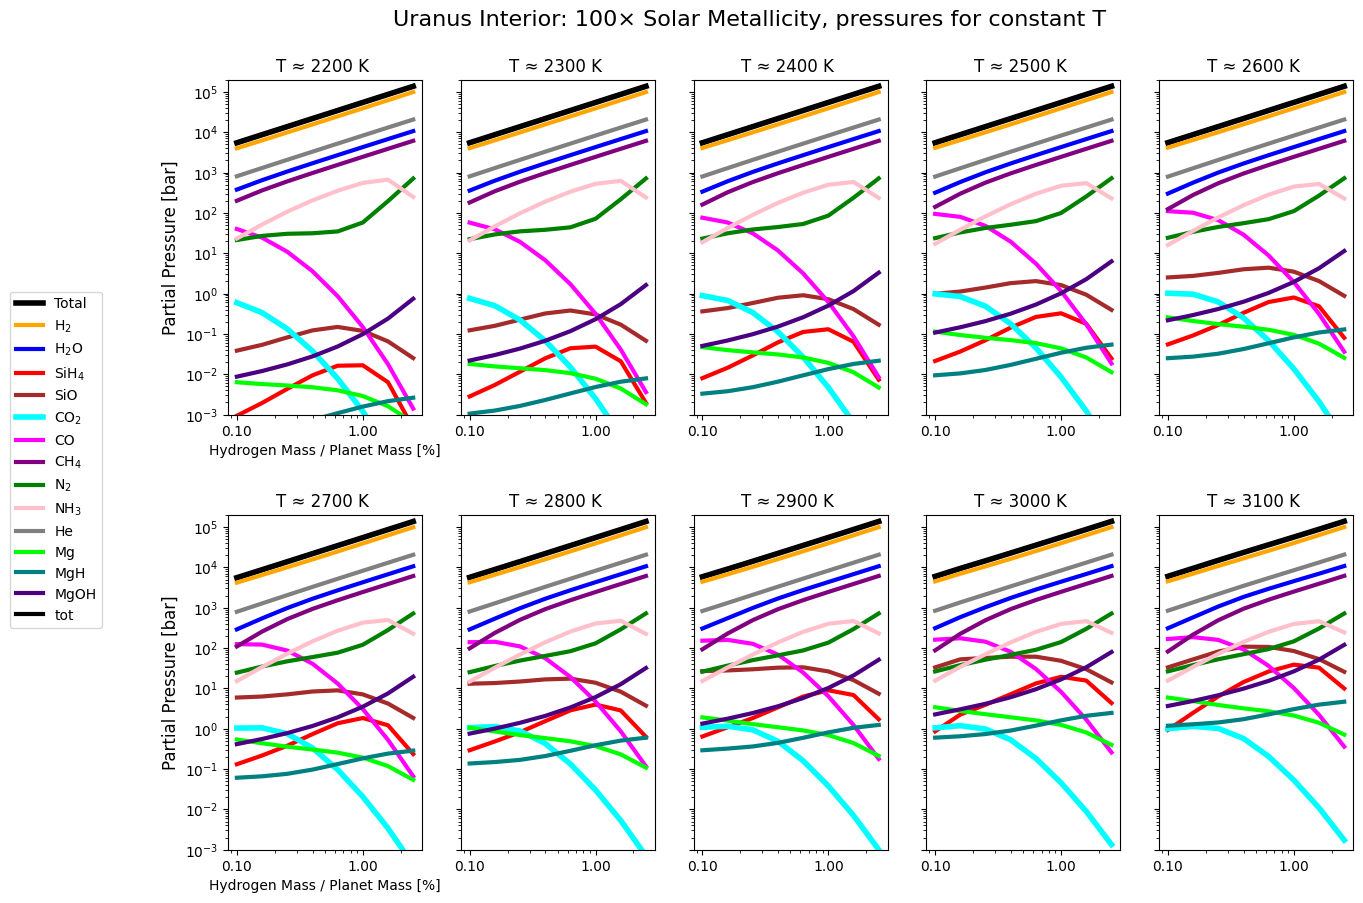

In [34]:
N = T_resolution
cols = 5
rows = (N + cols - 1) // cols

fig_big, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), sharey='row')
axes = axes.flatten()
legend_handles = None
legend_labels = None

for i in range(T_resolution):
    values = list(range(i*H_resolution, i*H_resolution + H_resolution))
    Temp = temperature[i*H_resolution]
    print(Temp)

    fig, ax = plt.subplots(1, 1, figsize=(15, 20))

    ax.plot(hmps[values][:-2], tot_pressure_magma_sol_real[values][:-2], color=color_tot, lw=4, ls="-", label="Total")
    ax.plot(hmps[values][:-2], H2_pressure_magma_sol_real[values][:-2], color=color_H2, lw=3, ls="-", label="H$_2$")
    ax.plot(hmps[values][:-2], H2O_pressure_magma_sol_real[values][:-2], color=color_H2O, lw=3, ls="-", label="H$_2$O")
    ax.plot(hmps[values][:-2], SiH4_pressure_magma_sol_real[values][:-2], color=color_SiH4, lw=3, ls="-", label="SiH$_4$")
    ax.plot(hmps[values][:-2], SiO_pressure_magma_sol_real[values][:-2], color=color_SiO, lw=3, ls="-", label="SiO")
    ax.plot(hmps[values][:-2], CO2_pressure_magma_sol_real[values][:-2], color=color_CO2, lw=4, ls="-", label="CO$_2$")
    ax.plot(hmps[values][:-2], CO_pressure_magma_sol_real[values][:-2], color=color_CO, lw=3, ls="-", label="CO")
    ax.plot(hmps[values][:-2], CH4_pressure_magma_sol_real[values][:-2], color=color_CH4, lw=3, ls="-", label="CH$_4$")
    ax.plot(hmps[values][:-2], N2_pressure_magma_sol_real[values][:-2], color=color_N2, lw=3, ls="-", label="N$_2$")
    ax.plot(hmps[values][:-2], NH3_pressure_magma_sol_real[values][:-2], color=color_NH3, lw=3, ls="-", label="NH$_3$")
    ax.plot(hmps[values][:-2], He_pressure_magma_sol_real[values][:-2], color=color_He, lw=3, ls="-", label="He")
    ax.plot(hmps[values][:-2], Mg_pressure_magma_sol_real[values][:-2], color=color_Mg, lw=3, ls="-", label="Mg")
    ax.plot(hmps[values][:-2], MgH_pressure_magma_sol_real[values][:-2], color=color_MgH, lw=3, ls="-", label="MgH")
    ax.plot(hmps[values][:-2], MgOH_pressure_magma_sol_real[values][:-2], color=color_MgOH, lw=3, ls="-", label="MgOH")
    ax.plot(hmps[values][:-2], tot_pressure_magma_sol_real[values][:-2], color=color_tot, lw=3, ls="-", label="tot")

    ax.set_title(r"(a) Real gas")
    ax.set_ylim([1e-3, 2e5])
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(r"Hydrogen Mass / Planet Mass [%]", fontsize=10)
    ax.set_ylabel(r"Partial Pressure [bar]", fontsize=12)
    ax.get_xaxis().set_major_formatter(ScalarFormatter())

    ax.legend(fontsize=10, loc='best') 
        
    plt.tight_layout()
    title = f"Uranus Interior: 100× Solar Metallicity, T ≈ {Temp:.0f} K"
    filename = f"./excelfiles/uranus_100xT_{Temp:.0f}K.png"

    plt.title(title)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    #plt.show()
    plt.close(fig)

    axes[i].plot(hmps[values][:-2], tot_pressure_magma_sol_real[values][:-2], color=color_tot, lw=4, ls="-", label="Total")
    axes[i].plot(hmps[values][:-2], H2_pressure_magma_sol_real[values][:-2], color=color_H2, lw=3, ls="-", label="H$_2$")
    axes[i].plot(hmps[values][:-2], H2O_pressure_magma_sol_real[values][:-2], color=color_H2O, lw=3, ls="-", label="H$_2$O")
    axes[i].plot(hmps[values][:-2], SiH4_pressure_magma_sol_real[values][:-2], color=color_SiH4, lw=3, ls="-", label="SiH$_4$")
    axes[i].plot(hmps[values][:-2], SiO_pressure_magma_sol_real[values][:-2], color=color_SiO, lw=3, ls="-", label="SiO")
    axes[i].plot(hmps[values][:-2], CO2_pressure_magma_sol_real[values][:-2], color=color_CO2, lw=4, ls="-", label="CO$_2$")
    axes[i].plot(hmps[values][:-2], CO_pressure_magma_sol_real[values][:-2], color=color_CO, lw=3, ls="-", label="CO")
    axes[i].plot(hmps[values][:-2], CH4_pressure_magma_sol_real[values][:-2], color=color_CH4, lw=3, ls="-", label="CH$_4$")
    axes[i].plot(hmps[values][:-2], N2_pressure_magma_sol_real[values][:-2], color=color_N2, lw=3, ls="-", label="N$_2$")
    axes[i].plot(hmps[values][:-2], NH3_pressure_magma_sol_real[values][:-2], color=color_NH3, lw=3, ls="-", label="NH$_3$")
    axes[i].plot(hmps[values][:-2], He_pressure_magma_sol_real[values][:-2], color=color_He, lw=3, ls="-", label="He")
    axes[i].plot(hmps[values][:-2], Mg_pressure_magma_sol_real[values][:-2], color=color_Mg, lw=3, ls="-", label="Mg")
    axes[i].plot(hmps[values][:-2], MgH_pressure_magma_sol_real[values][:-2], color=color_MgH, lw=3, ls="-", label="MgH")
    axes[i].plot(hmps[values][:-2], MgOH_pressure_magma_sol_real[values][:-2], color=color_MgOH, lw=3, ls="-", label="MgOH")
    axes[i].plot(hmps[values][:-2], tot_pressure_magma_sol_real[values][:-2], color=color_tot, lw=3, ls="-", label="tot")

    axes[i].set_title(f"T ≈ {Temp:.0f} K ")
    axes[i].set_ylim([1e-3, 2e5])
    axes[i].set_ylim([1e-3, 2e5])
    axes[i].set_yscale("log")
    axes[i].set_xscale("log")
    #axes[i].set_xlabel(r"Hydrogen Mass / Planet Mass [%]", fontsize=10)
    #axes[i].set_ylabel(r"MEB Partial Pressure [bar]", fontsize=12)
    axes[i].get_xaxis().set_major_formatter(ScalarFormatter())
        # Capture the legend only once
    if legend_handles is None:
        legend_handles, legend_labels = axes[i].get_legend_handles_labels()
    axes[i].legend().remove() 

    if i % cols ==0:
        axes[i].set_xlabel(r"Hydrogen Mass / Planet Mass [%]", fontsize=10)
        axes[i].set_ylabel(r"Partial Pressure [bar]", fontsize=12)

# Adjust spacing
fig_big.subplots_adjust(hspace=0.3, wspace=0.2)
fig_big.subplots_adjust(left=0.15)

# Plot ONE legend on the left side, centered vertically
fig_big.legend(
    legend_handles,
    legend_labels,
    loc='center left',
    bbox_to_anchor=(0, 0.5)   # x-position, y-position
)

fig_big.suptitle(f"Uranus Interior: 100× Solar Metallicity, pressures for constant T ", fontsize=16, y=0.95) 
fig_big.savefig(f"./excelfiles/uranus_100x_constantT_pressure.png", dpi=300, bbox_inches='tight')

2000.0
2100.0
2200.0
2300.0
2400.0
2500.0
2600.0
2700.0
2800.0
2900.0


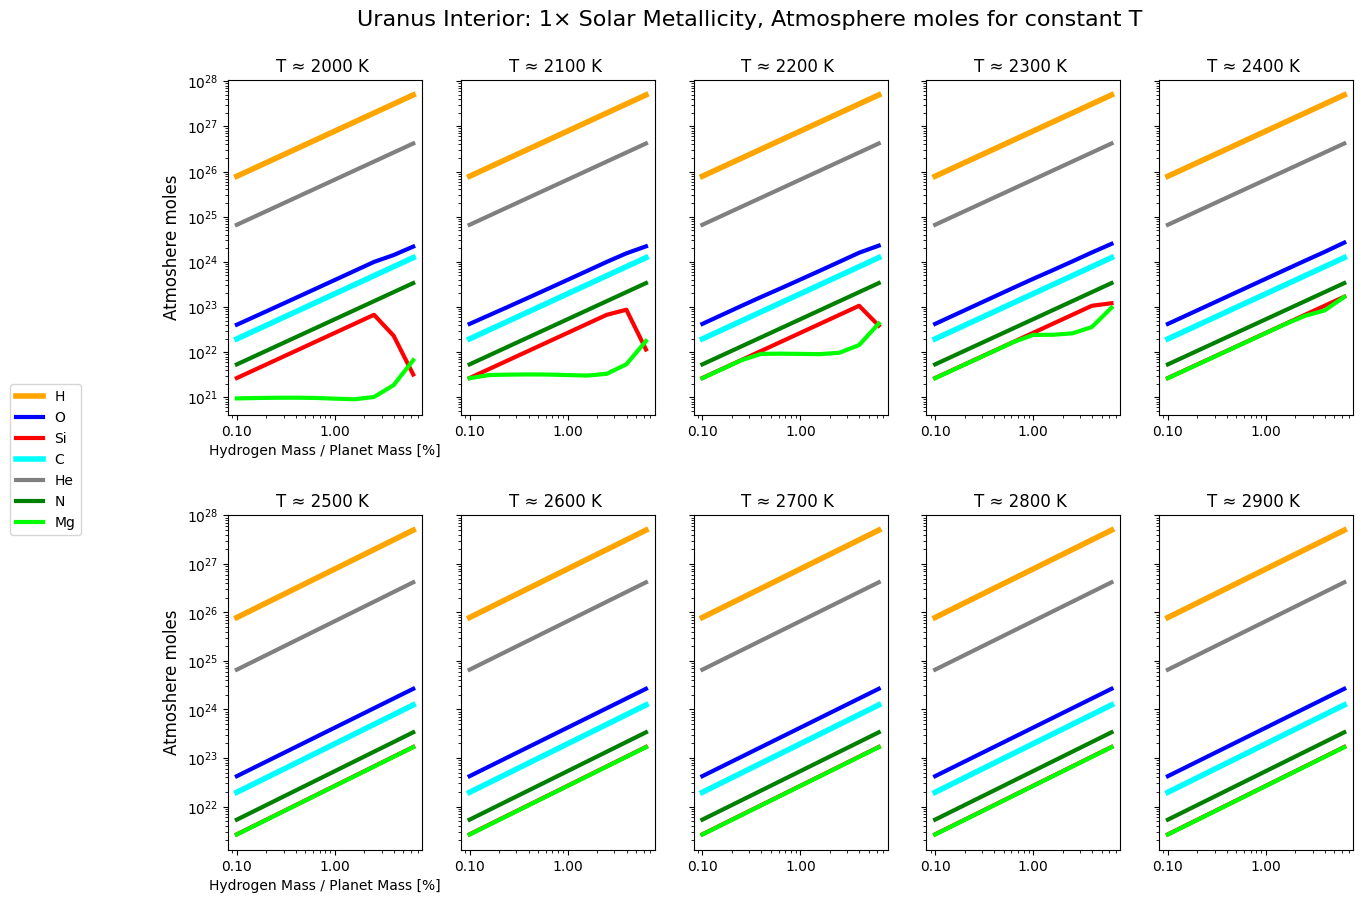

In [52]:
temperature = np.repeat(np.linspace(2000, 3000, T_resolution, endpoint=False), H_resolution)
temperature = temperature.flatten()
hmps = np.tile(np.logspace(-1, 0.8, num=H_resolution), int(np.ceil(T_resolution)))[:T_resolution*H_resolution]
hmps = hmps.flatten()

N = T_resolution
cols = 5
rows = (N + cols - 1) // cols

fig_big, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), sharey='row')
axes = axes.flatten()
legend_handles = None
legend_labels = None

for i in range(T_resolution):
    values = list(range(i*H_resolution, i*H_resolution + H_resolution))
    Temp = temperature[i*H_resolution]
    print(Temp)

    fig, ax = plt.subplots(1, 1, figsize=(15, 20))

    ax.plot(hmps[values], H_moles_atm_magma_sol_real[values], color=color_H, lw=4, ls="-", label="H")
    ax.plot(hmps[values], O_moles_atm_magma_sol_real[values], color=color_O, lw=3, ls="-", label="O")
    ax.plot(hmps[values], Si_moles_atm_magma_sol_real[values], color=color_Si, lw=3, ls="-", label="Si")
    ax.plot(hmps[values], C_moles_atm_magma_sol_real[values], color=color_C, lw=4, ls="-", label="C")
    ax.plot(hmps[values], He_moles_atm_magma_sol_real[values], color=color_He, lw=3, ls="-", label="He")
    ax.plot(hmps[values], N_moles_atm_magma_sol_real[values], color=color_N, lw=3, ls="-", label="N")
    ax.plot(hmps[values], Mg_moles_atm_magma_sol_real[values], color=color_Mg, lw=3, ls="-", label="Mg")

    ax.set_title(r"(a) Real gas")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(r"Hydrogen Mass / Planet Mass [%]", fontsize=10)
    ax.set_ylabel(r"Atmosphere moles", fontsize=12)
    ax.get_xaxis().set_major_formatter(ScalarFormatter())

    ax.legend(fontsize=10, loc='best') 
        
    plt.tight_layout()
    title = f"Uranus Interior: 1× Solar Metallicity, T ≈ {Temp:.0f} K"
    filename = f"./excelfiles/uranus_1xT_{Temp:.0f}K_Atmosphere_Moles.png"

    plt.title(title)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    #plt.show()
    plt.close(fig)

    axes[i].plot(hmps[values], H_moles_atm_magma_sol_real[values], color=color_H, lw=4, ls="-", label="H")
    axes[i].plot(hmps[values], O_moles_atm_magma_sol_real[values], color=color_O, lw=3, ls="-", label="O")
    axes[i].plot(hmps[values], Si_moles_atm_magma_sol_real[values], color=color_Si, lw=3, ls="-", label="Si")
    axes[i].plot(hmps[values], C_moles_atm_magma_sol_real[values], color=color_C, lw=4, ls="-", label="C")
    axes[i].plot(hmps[values], He_moles_atm_magma_sol_real[values], color=color_He, lw=3, ls="-", label="He")
    axes[i].plot(hmps[values], N_moles_atm_magma_sol_real[values], color=color_N, lw=3, ls="-", label="N")
    axes[i].plot(hmps[values], Mg_moles_atm_magma_sol_real[values], color=color_Mg, lw=3, ls="-", label="Mg")

    axes[i].set_title(f"T ≈ {Temp:.0f} K ")
    axes[i].set_yscale("log")
    axes[i].set_xscale("log")
    #axes[i].set_xlabel(r"Hydrogen Mass / Planet Mass [%]", fontsize=10)
    #axes[i].set_ylabel(r"MEB Partial Pressure [bar]", fontsize=12)
    axes[i].get_xaxis().set_major_formatter(ScalarFormatter())
        # Capture the legend only once
    if legend_handles is None:
        legend_handles, legend_labels = axes[i].get_legend_handles_labels()
    axes[i].legend().remove() 

    if i % cols ==0:
        axes[i].set_xlabel(r"Hydrogen Mass / Planet Mass [%]", fontsize=10)
        axes[i].set_ylabel(r"Atmoshere moles", fontsize=12)

# Adjust spacing
fig_big.subplots_adjust(hspace=0.3, wspace=0.2)
fig_big.subplots_adjust(left=0.15)

# Plot ONE legend on the left side, centered vertically
fig_big.legend(
    legend_handles,
    legend_labels,
    loc='center left',
    bbox_to_anchor=(0, 0.5)   # x-position, y-position
)

fig_big.suptitle(f"Uranus Interior: 1× Solar Metallicity, Atmosphere moles for constant T ", fontsize=16, y=0.95) 
fig_big.savefig(f"./excelfiles/uranus_1x_constantT_Atmosphere_Moles.png", dpi=300, bbox_inches='tight')

2000.0
2100.0
2200.0
2300.0
2400.0
2500.0
2600.0
2700.0
2800.0
2900.0


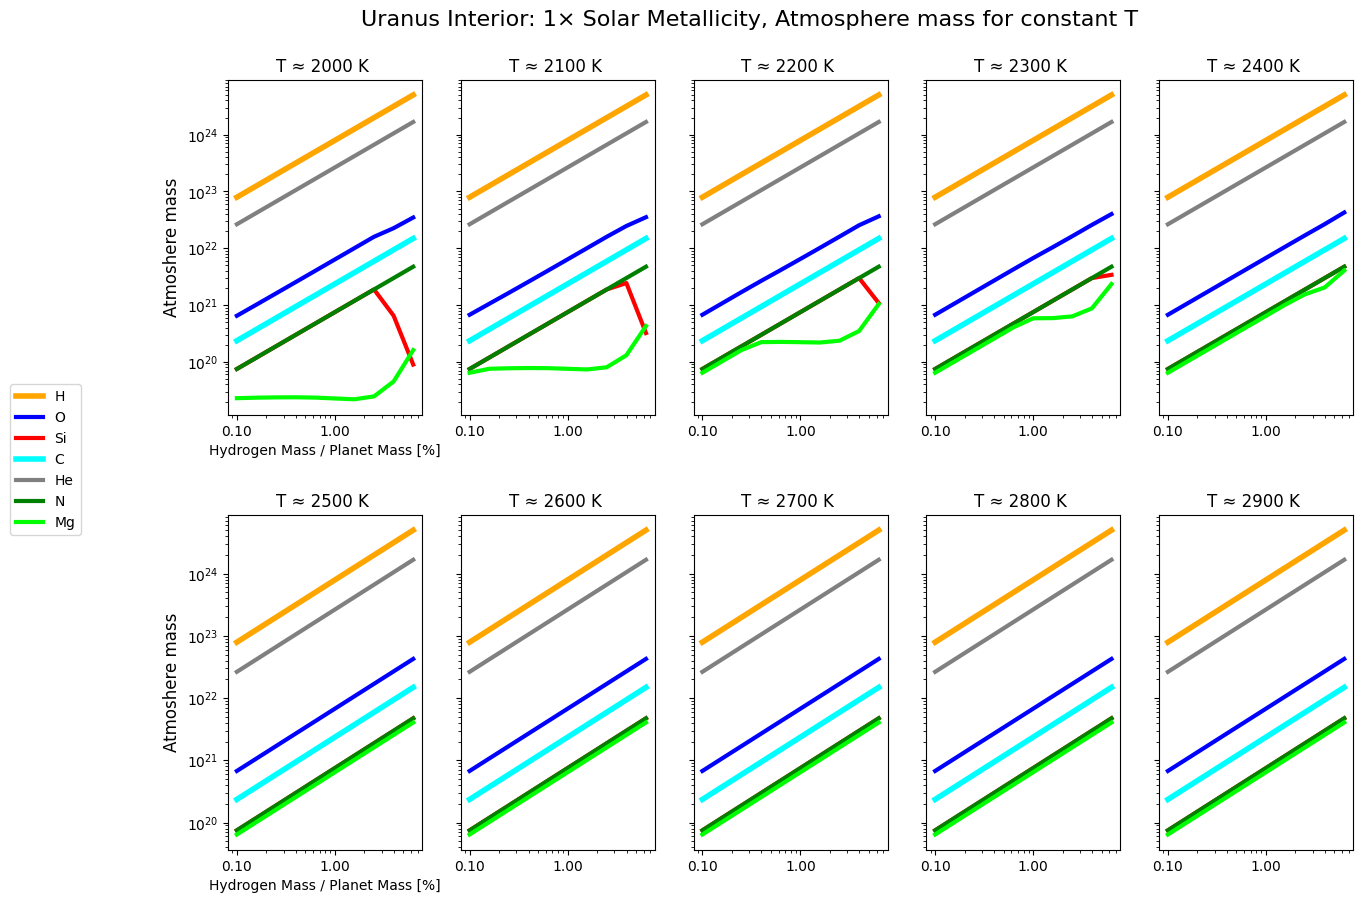

In [53]:
#atmosphere mass
fig_big, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), sharey='row')
axes = axes.flatten()
legend_handles = None
legend_labels = None

for i in range(T_resolution):
    values = list(range(i*H_resolution, i*H_resolution + H_resolution))
    Temp = temperature[i*H_resolution]
    print(Temp)

    fig, ax = plt.subplots(1, 1, figsize=(15, 20))

    ax.plot(hmps[values], H_mass_atm_magma_sol_real[values], color=color_H, lw=4, ls="-", label="H")
    ax.plot(hmps[values], O_mass_atm_magma_sol_real[values], color=color_O, lw=3, ls="-", label="O")
    ax.plot(hmps[values], Si_mass_atm_magma_sol_real[values], color=color_Si, lw=3, ls="-", label="Si")
    ax.plot(hmps[values], C_mass_atm_magma_sol_real[values], color=color_C, lw=4, ls="-", label="C")
    ax.plot(hmps[values], He_mass_atm_magma_sol_real[values], color=color_He, lw=3, ls="-", label="He")
    ax.plot(hmps[values], N_mass_atm_magma_sol_real[values], color=color_N, lw=3, ls="-", label="N")
    ax.plot(hmps[values], Mg_mass_atm_magma_sol_real[values], color=color_Mg, lw=3, ls="-", label="Mg")

    ax.set_title(r"(a) Real gas")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(r"Hydrogen Mass / Planet Mass [%]", fontsize=10)
    ax.set_ylabel(r"Atmosphere mass", fontsize=12)
    ax.get_xaxis().set_major_formatter(ScalarFormatter())

    ax.legend(fontsize=10, loc='best') 
        
    plt.tight_layout()
    title = f"Uranus Interior: 1× Solar Metallicity, T ≈ {Temp:.0f} K"
    filename = f"./excelfiles/uranus_1xT_{Temp:.0f}K_Atmosphere_Mass.png"

    plt.title(title)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    #plt.show()
    plt.close(fig)

    axes[i].plot(hmps[values], H_mass_atm_magma_sol_real[values], color=color_H, lw=4, ls="-", label="H")
    axes[i].plot(hmps[values], O_mass_atm_magma_sol_real[values], color=color_O, lw=3, ls="-", label="O")
    axes[i].plot(hmps[values], Si_mass_atm_magma_sol_real[values], color=color_Si, lw=3, ls="-", label="Si")
    axes[i].plot(hmps[values], C_mass_atm_magma_sol_real[values], color=color_C, lw=4, ls="-", label="C")
    axes[i].plot(hmps[values], He_mass_atm_magma_sol_real[values], color=color_He, lw=3, ls="-", label="He")
    axes[i].plot(hmps[values], N_mass_atm_magma_sol_real[values], color=color_N, lw=3, ls="-", label="N")
    axes[i].plot(hmps[values], Mg_mass_atm_magma_sol_real[values], color=color_Mg, lw=3, ls="-", label="Mg")

    axes[i].set_title(f"T ≈ {Temp:.0f} K ")
    axes[i].set_yscale("log")
    axes[i].set_xscale("log")
    #axes[i].set_xlabel(r"Hydrogen Mass / Planet Mass [%]", fontsize=10)
    #axes[i].set_ylabel(r"MEB Partial Pressure [bar]", fontsize=12)
    axes[i].get_xaxis().set_major_formatter(ScalarFormatter())
        # Capture the legend only once
    if legend_handles is None:
        legend_handles, legend_labels = axes[i].get_legend_handles_labels()
    axes[i].legend().remove() 

    if i % cols ==0:
        axes[i].set_xlabel(r"Hydrogen Mass / Planet Mass [%]", fontsize=10)
        axes[i].set_ylabel(r"Atmoshere mass", fontsize=12)

# Adjust spacing
fig_big.subplots_adjust(hspace=0.3, wspace=0.2)
fig_big.subplots_adjust(left=0.15)

# Plot ONE legend on the left side, centered vertically
fig_big.legend(
    legend_handles,
    legend_labels,
    loc='center left',
    bbox_to_anchor=(0, 0.5)   # x-position, y-position
)

fig_big.suptitle(f"Uranus Interior: 1× Solar Metallicity, Atmosphere mass for constant T ", fontsize=16, y=0.95) 
fig_big.savefig(f"./excelfiles/uranus_1x_constantT_Atmosphere_Mass.png", dpi=300, bbox_inches='tight')

In [ ]:
filename = "HHeCNOSi_magma_sol_real.xlsx"

H2_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="H2_g")["pressure"]
H2O_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="H2O_g")["pressure"]
O2_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="O2_g")["pressure"]
SiH4_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="H4Si_g")["pressure"]
SiO_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="OSi_g")["pressure"]
CO2_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="CO2_g")["pressure"]
CO_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="CO_g")["pressure"]
CH4_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="CH4_g")["pressure"]
N2_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="N2_g")["pressure"]
NH3_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="H3N_g")["pressure"]
He_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="He_g")["pressure"]
Mg_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="Mg_g")["pressure"]
MgOH_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="HMgO_g")["pressure"]
MgH_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="HMg_g")["pressure"]
tot_pressure_magma_sol_real = pd.read_excel(filename, sheet_name="atmosphere")["pressure"]

H_moles_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_H")["atmosphere_moles"]
O_moles_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_O")["atmosphere_moles"]
Si_moles_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_Si")["atmosphere_moles"]
C_moles_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_C")["atmosphere_moles"]
He_moles_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_He")["atmosphere_moles"]
N_moles_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_N")["atmosphere_moles"]
Mg_moles_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_Mg")["atmosphere_moles"]

H_moles_melt_magma_sol_real = pd.read_excel(filename, sheet_name="element_H")["dissolved_moles"]
O_moles_melt_magma_sol_real = pd.read_excel(filename, sheet_name="element_O")["dissolved_moles"]
Si_moles_melt_magma_sol_real = pd.read_excel(filename, sheet_name="element_Si")["dissolved_moles"]
C_moles_melt_magma_sol_real = pd.read_excel(filename, sheet_name="element_C")["dissolved_moles"]
He_moles_melt_magma_sol_real = pd.read_excel(filename, sheet_name="element_He")["dissolved_moles"]
N_moles_melt_magma_sol_real = pd.read_excel(filename, sheet_name="element_N")["dissolved_moles"]
Mg_moles_melt_magma_sol_real = pd.read_excel(filename, sheet_name="element_Mg")["dissolved_moles"]

H_moles_tot_magma_sol_real = pd.read_excel(filename, sheet_name="element_H")["total_moles"]
O_moles_tot_magma_sol_real = pd.read_excel(filename, sheet_name="element_O")["total_moles"]
Si_moles_tot_magma_sol_real = pd.read_excel(filename, sheet_name="element_Si")["total_moles"]
C_moles_tot_magma_sol_real = pd.read_excel(filename, sheet_name="element_C")["total_moles"]
He_moles_tot_magma_sol_real = pd.read_excel(filename, sheet_name="element_He")["total_moles"]
N_moles_tot_magma_sol_real = pd.read_excel(filename, sheet_name="element_N")["total_moles"]
Mg_moles_tot_magma_sol_real = pd.read_excel(filename, sheet_name="element_Mg")["total_moles"]

H_mass_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_H")["atmosphere_mass"]
O_mass_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_O")["atmosphere_mass"]
Si_mass_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_Si")["atmosphere_mass"]
C_mass_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_C")["atmosphere_mass"]
He_mass_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_He")["atmosphere_mass"]
N_mass_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_N")["atmosphere_mass"]
Mg_mass_atm_magma_sol_real = pd.read_excel(filename, sheet_name="element_Mg")["atmosphere_mass"]

H_mass_melt_magma_sol_real = pd.read_excel(filename, sheet_name="element_H")["dissolved_mass"]
O_mass_melt_magma_sol_real = pd.read_excel(filename, sheet_name="element_O")["dissolved_mass"]
Si_mass_melt_magma_sol_real = pd.read_excel(filename, sheet_name="element_Si")["dissolved_mass"]
C_mass_melt_magma_sol_real = pd.read_excel(filename, sheet_name="element_C")["dissolved_mass"]
He_mass_melt_magma_sol_real = pd.read_excel(filename, sheet_name="element_He")["dissolved_mass"]
N_mass_melt_magma_sol_real = pd.read_excel(filename, sheet_name="element_N")["dissolved_mass"]
Mg_mass_melt_magma_sol_real = pd.read_excel(filename, sheet_name="element_Mg")["dissolved_mass"]

H_mass_tot_magma_sol_real = pd.read_excel(filename, sheet_name="element_H")["total_mass"]
O_mass_tot_magma_sol_real = pd.read_excel(filename, sheet_name="element_O")["total_mass"]
Si_mass_tot_magma_sol_real = pd.read_excel(filename, sheet_name="element_Si")["total_mass"]
C_mass_tot_magma_sol_real = pd.read_excel(filename, sheet_name="element_C")["total_mass"]
He_mass_tot_magma_sol_real = pd.read_excel(filename, sheet_name="element_He")["total_mass"]
N_mass_tot_magma_sol_real = pd.read_excel(filename, sheet_name="element_N")["total_mass"]
Mg_mass_tot_magma_sol_real = pd.read_excel(filename, sheet_name="element_Mg")["total_mass"]

In [ ]:
N = H_resolution
cols = 5
rows = (N + cols - 1) // cols


fig_big, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), sharey='row')
axes = axes.flatten()
legend_handles = None
legend_labels = None

for i in range(H_resolution):
    indices = np.arange(T_resolution)
    values = i + indices * H_resolution
    values = np.array(values)
    Hwt = hmps[i]

    fig, ax = plt.subplots(1, 1, figsize=(15, 20))

    ax.plot(temperature[values], tot_pressure_magma_sol_real[values], color=color_tot, lw=4, ls="-", label="Total")
    ax.plot(temperature[values], H2_pressure_magma_sol_real[values], color=color_H2, lw=3, ls="-", label="H$_2$")
    ax.plot(temperature[values], H2O_pressure_magma_sol_real[values], color=color_H2O, lw=3, ls="-", label="H$_2$O")
    ax.plot(temperature[values], SiH4_pressure_magma_sol_real[values], color=color_SiH4, lw=3, ls="-", label="SiH$_4$")
    ax.plot(temperature[values], SiO_pressure_magma_sol_real[values], color=color_SiO, lw=3, ls="-", label="SiO")
    ax.plot(temperature[values], CO2_pressure_magma_sol_real[values], color=color_CO2, lw=4, ls="-", label="CO$_2$")
    ax.plot(temperature[values], CO_pressure_magma_sol_real[values], color=color_CO, lw=3, ls="-", label="CO")
    ax.plot(temperature[values], CH4_pressure_magma_sol_real[values], color=color_CH4, lw=3, ls="-", label="CH$_4$")
    ax.plot(temperature[values], N2_pressure_magma_sol_real[values], color=color_N2, lw=3, ls="-", label="N$_2$")
    ax.plot(temperature[values], NH3_pressure_magma_sol_real[values], color=color_NH3, lw=3, ls="-", label="NH$_3$")
    ax.plot(temperature[values], He_pressure_magma_sol_real[values], color=color_He, lw=3, ls="-", label="He")
    ax.plot(temperature[values], Mg_pressure_magma_sol_real[values], color=color_Mg, lw=3, ls="-", label="Mg")
    ax.plot(temperature[values], MgH_pressure_magma_sol_real[values], color=color_MgH, lw=3, ls="-", label="MgH")
    ax.plot(temperature[values], MgOH_pressure_magma_sol_real[values], color=color_MgOH, lw=3, ls="-", label="MgOH")
    ax.plot(temperature[values], tot_pressure_magma_sol_real[values], color=color_tot, lw=3, ls="-", label="tot")

    ax.set_title(r"(a) Real gas")
    ax.set_ylim([1e-3, 2e5])
    ax.set_yscale("log")
    ax.set_xlabel(r"Temperature", fontsize=10)
    ax.set_ylabel(r"MEB Partial Pressure [bar]", fontsize=12)
    ax.get_xaxis().set_major_formatter(ScalarFormatter())

    ax.legend(fontsize=10, loc='best') 
        
    plt.tight_layout()
    title = f"Uranus Interior: {metall:.0f}× Solar Metallicity, H %wt ≈ {Hwt:.2f} "
    filename = f"./image_Nettelman_U1/uranus_{metall:.0f}xperc_{Hwt:.2f}.png"

    plt.title(title)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    #plt.show()
    plt.close(fig)

    axes[i].plot(temperature[values], tot_pressure_magma_sol_real[values], color=color_tot, lw=4, ls="-", label="Total")
    axes[i].plot(temperature[values], H2_pressure_magma_sol_real[values], color=color_H2, lw=3, ls="-", label="H$_2$")
    axes[i].plot(temperature[values], H2O_pressure_magma_sol_real[values], color=color_H2O, lw=3, ls="-", label="H$_2$O")
    axes[i].plot(temperature[values], SiH4_pressure_magma_sol_real[values], color=color_SiH4, lw=3, ls="-", label="SiH$_4$")
    axes[i].plot(temperature[values], SiO_pressure_magma_sol_real[values], color=color_SiO, lw=3, ls="-", label="SiO")
    axes[i].plot(temperature[values], CO2_pressure_magma_sol_real[values], color=color_CO2, lw=4, ls="-", label="CO$_2$")
    axes[i].plot(temperature[values], CO_pressure_magma_sol_real[values], color=color_CO, lw=3, ls="-", label="CO")
    axes[i].plot(temperature[values], CH4_pressure_magma_sol_real[values], color=color_CH4, lw=3, ls="-", label="CH$_4$")
    axes[i].plot(temperature[values], N2_pressure_magma_sol_real[values], color=color_N2, lw=3, ls="-", label="N$_2$")
    axes[i].plot(temperature[values], NH3_pressure_magma_sol_real[values], color=color_NH3, lw=3, ls="-", label="NH$_3$")
    axes[i].plot(temperature[values], He_pressure_magma_sol_real[values], color=color_He, lw=3, ls="-", label="He")
    axes[i].plot(temperature[values], Mg_pressure_magma_sol_real[values], color=color_Mg, lw=3, ls="-", label="Mg")
    axes[i].plot(temperature[values], MgH_pressure_magma_sol_real[values], color=color_MgH, lw=3, ls="-", label="MgH")
    axes[i].plot(temperature[values], MgOH_pressure_magma_sol_real[values], color=color_MgOH, lw=3, ls="-", label="MgOH")
    axes[i].plot(temperature[values], tot_pressure_magma_sol_real[values], color=color_tot, lw=3, ls="-", label="tot")

    axes[i].set_title(f"H %wt ≈ {Hwt:.2f} ")
    axes[i].set_ylim([1e-3, 2e5])
    axes[i].set_yscale("log")
    axes[i].set_xlabel(r"Temperature", fontsize=10)
    axes[i].set_ylabel(r"MEB Partial Pressure [bar]", fontsize=12)
    axes[i].get_xaxis().set_major_formatter(ScalarFormatter())
        # Capture the legend only once
    if legend_handles is None:
        legend_handles, legend_labels = axes[i].get_legend_handles_labels()
    axes[i].legend().remove() 
        
fig_big.subplots_adjust(left=0.15)

# Plot ONE legend on the left side, centered vertically
fig_big.legend(
    legend_handles,
    legend_labels,
    loc='center left',
    bbox_to_anchor=(0, 0.5)   # x-position, y-position
)

fig_big.suptitle(f"Uranus Interior: {metall:.0f}× Solar Metallicity, MEB pressures ", fontsize=16, y=0.95) 
fig_big.savefig(f"./image_Nettelman_U1/uranus_{metall:.0f}x.png", dpi=300, bbox_inches='tight')

In [ ]:
N = T_resolution
cols = 5
rows = (N + cols - 1) // cols

In [ ]:
#MEB partial pressure 
fig_big, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), sharey='row')
axes = axes.flatten()
legend_handles = None
legend_labels = None

for i in range(T_resolution):
    values = list(range(i*H_resolution, i*H_resolution + H_resolution))
    Temp = temperature[i*H_resolution]
    print(Temp)

    fig, ax = plt.subplots(1, 1, figsize=(15, 20))

    ax.plot(hmps[values], tot_pressure_magma_sol_real[values], color=color_tot, lw=4, ls="-", label="Total")
    ax.plot(hmps[values], H2_pressure_magma_sol_real[values], color=color_H2, lw=3, ls="-", label="H$_2$")
    ax.plot(hmps[values], H2O_pressure_magma_sol_real[values], color=color_H2O, lw=3, ls="-", label="H$_2$O")
    ax.plot(hmps[values], SiH4_pressure_magma_sol_real[values], color=color_SiH4, lw=3, ls="-", label="SiH$_4$")
    ax.plot(hmps[values], SiO_pressure_magma_sol_real[values], color=color_SiO, lw=3, ls="-", label="SiO")
    ax.plot(hmps[values], CO2_pressure_magma_sol_real[values], color=color_CO2, lw=4, ls="-", label="CO$_2$")
    ax.plot(hmps[values], CO_pressure_magma_sol_real[values], color=color_CO, lw=3, ls="-", label="CO")
    ax.plot(hmps[values], CH4_pressure_magma_sol_real[values], color=color_CH4, lw=3, ls="-", label="CH$_4$")
    ax.plot(hmps[values], N2_pressure_magma_sol_real[values], color=color_N2, lw=3, ls="-", label="N$_2$")
    ax.plot(hmps[values], NH3_pressure_magma_sol_real[values], color=color_NH3, lw=3, ls="-", label="NH$_3$")
    ax.plot(hmps[values], He_pressure_magma_sol_real[values], color=color_He, lw=3, ls="-", label="He")
    ax.plot(hmps[values], Mg_pressure_magma_sol_real[values], color=color_Mg, lw=3, ls="-", label="Mg")
    ax.plot(hmps[values], MgH_pressure_magma_sol_real[values], color=color_MgH, lw=3, ls="-", label="MgH")
    ax.plot(hmps[values], MgOH_pressure_magma_sol_real[values], color=color_MgOH, lw=3, ls="-", label="MgOH")
    ax.plot(hmps[values], tot_pressure_magma_sol_real[values], color=color_tot, lw=3, ls="-", label="tot")

    ax.set_title(r"(a) Real gas")
    ax.set_ylim([1e-3, 2e5])
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(r"Hydrogen Mass / Planet Mass [%]", fontsize=10)
    ax.set_ylabel(r"MEB Partial Pressure [bar]", fontsize=12)
    ax.get_xaxis().set_major_formatter(ScalarFormatter())

    ax.legend(fontsize=10, loc='best') 
        
    plt.tight_layout()
    title = f"Uranus Interior: {metall:.0f}× Solar Metallicity, T ≈ {Temp:.0f} K"
    filename = f"./image_Nettelman_U1/uranus_{metall:.0f}xT_{Temp:.0f}K.png"

    plt.title(title)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    #plt.show()
    plt.close(fig)

    axes[i].plot(hmps[values], tot_pressure_magma_sol_real[values], color=color_tot, lw=4, ls="-", label="Total")
    axes[i].plot(hmps[values], H2_pressure_magma_sol_real[values], color=color_H2, lw=3, ls="-", label="H$_2$")
    axes[i].plot(hmps[values], H2O_pressure_magma_sol_real[values], color=color_H2O, lw=3, ls="-", label="H$_2$O")
    axes[i].plot(hmps[values], SiH4_pressure_magma_sol_real[values], color=color_SiH4, lw=3, ls="-", label="SiH$_4$")
    axes[i].plot(hmps[values], SiO_pressure_magma_sol_real[values], color=color_SiO, lw=3, ls="-", label="SiO")
    axes[i].plot(hmps[values], CO2_pressure_magma_sol_real[values], color=color_CO2, lw=4, ls="-", label="CO$_2$")
    axes[i].plot(hmps[values], CO_pressure_magma_sol_real[values], color=color_CO, lw=3, ls="-", label="CO")
    axes[i].plot(hmps[values], CH4_pressure_magma_sol_real[values], color=color_CH4, lw=3, ls="-", label="CH$_4$")
    axes[i].plot(hmps[values], N2_pressure_magma_sol_real[values], color=color_N2, lw=3, ls="-", label="N$_2$")
    axes[i].plot(hmps[values], NH3_pressure_magma_sol_real[values], color=color_NH3, lw=3, ls="-", label="NH$_3$")
    axes[i].plot(hmps[values], He_pressure_magma_sol_real[values], color=color_He, lw=3, ls="-", label="He")
    axes[i].plot(hmps[values], Mg_pressure_magma_sol_real[values], color=color_Mg, lw=3, ls="-", label="Mg")
    axes[i].plot(hmps[values], MgH_pressure_magma_sol_real[values], color=color_MgH, lw=3, ls="-", label="MgH")
    axes[i].plot(hmps[values], MgOH_pressure_magma_sol_real[values], color=color_MgOH, lw=3, ls="-", label="MgOH")
    axes[i].plot(hmps[values], tot_pressure_magma_sol_real[values], color=color_tot, lw=3, ls="-", label="tot")

    axes[i].set_title(f"T ≈ {Temp:.0f} K ")
    axes[i].set_ylim([1e-3, 2e5])
    axes[i].set_ylim([1e-3, 2e5])
    axes[i].set_yscale("log")
    axes[i].set_xscale("log")
    #axes[i].set_xlabel(r"Hydrogen Mass / Planet Mass [%]", fontsize=10)
    #axes[i].set_ylabel(r"MEB Partial Pressure [bar]", fontsize=12)
    axes[i].get_xaxis().set_major_formatter(ScalarFormatter())
        # Capture the legend only once
    if legend_handles is None:
        legend_handles, legend_labels = axes[i].get_legend_handles_labels()
    axes[i].legend().remove() 

    if i % cols ==0:
        axes[i].set_xlabel(r"Hydrogen Mass / Planet Mass [%]", fontsize=10)
        axes[i].set_ylabel(r"MEB Partial Pressure [bar]", fontsize=12)

# Adjust spacing
fig_big.subplots_adjust(hspace=0.3, wspace=0.2)
fig_big.subplots_adjust(left=0.15)

# Plot ONE legend on the left side, centered vertically
fig_big.legend(
    legend_handles,
    legend_labels,
    loc='center left',
    bbox_to_anchor=(0, 0.5)   # x-position, y-position
)

fig_big.suptitle(f"Uranus Interior: {metall:.0f}× Solar Metallicity, MEB pressures for constant T ", fontsize=16, y=0.95) 
fig_big.savefig(f"./image_Nettelman_U1/uranus_{metall:.0f}x_constantT_MEBpressure.png", dpi=300, bbox_inches='tight')

In [ ]:
#atmosphere moles
fig_big, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), sharey='row')
axes = axes.flatten()
legend_handles = None
legend_labels = None

for i in range(T_resolution):
    values = list(range(i*H_resolution, i*H_resolution + H_resolution))
    Temp = temperature[i*H_resolution]
    print(Temp)

    fig, ax = plt.subplots(1, 1, figsize=(15, 20))

    ax.plot(hmps[values], H_moles_atm_magma_sol_real[values], color=color_H, lw=4, ls="-", label="H")
    ax.plot(hmps[values], O_moles_atm_magma_sol_real[values], color=color_O, lw=3, ls="-", label="O")
    ax.plot(hmps[values], Si_moles_atm_magma_sol_real[values], color=color_Si, lw=3, ls="-", label="Si")
    ax.plot(hmps[values], C_moles_atm_magma_sol_real[values], color=color_C, lw=4, ls="-", label="C")
    ax.plot(hmps[values], He_moles_atm_magma_sol_real[values], color=color_He, lw=3, ls="-", label="He")
    ax.plot(hmps[values], N_moles_atm_magma_sol_real[values], color=color_N, lw=3, ls="-", label="N")
    ax.plot(hmps[values], Mg_moles_atm_magma_sol_real[values], color=color_Mg, lw=3, ls="-", label="Mg")

    ax.set_title(r"(a) Real gas")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(r"Hydrogen Mass / Planet Mass [%]", fontsize=10)
    ax.set_ylabel(r"Atmosphere moles", fontsize=12)
    ax.get_xaxis().set_major_formatter(ScalarFormatter())

    ax.legend(fontsize=10, loc='best') 
        
    plt.tight_layout()
    title = f"Uranus Interior: {metall:.0f}× Solar Metallicity, T ≈ {Temp:.0f} K"
    filename = f"./image_Nettelman_U1/uranus_{metall:.0f}xT_{Temp:.0f}K_Atmosphere_Moles.png"

    plt.title(title)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    #plt.show()
    plt.close(fig)

    axes[i].plot(hmps[values], H_moles_atm_magma_sol_real[values], color=color_H, lw=4, ls="-", label="H")
    axes[i].plot(hmps[values], O_moles_atm_magma_sol_real[values], color=color_O, lw=3, ls="-", label="O")
    axes[i].plot(hmps[values], Si_moles_atm_magma_sol_real[values], color=color_Si, lw=3, ls="-", label="Si")
    axes[i].plot(hmps[values], C_moles_atm_magma_sol_real[values], color=color_C, lw=4, ls="-", label="C")
    axes[i].plot(hmps[values], He_moles_atm_magma_sol_real[values], color=color_He, lw=3, ls="-", label="He")
    axes[i].plot(hmps[values], N_moles_atm_magma_sol_real[values], color=color_N, lw=3, ls="-", label="N")
    axes[i].plot(hmps[values], Mg_moles_atm_magma_sol_real[values], color=color_Mg, lw=3, ls="-", label="Mg")

    axes[i].set_title(f"T ≈ {Temp:.0f} K ")
    axes[i].set_yscale("log")
    axes[i].set_xscale("log")
    #axes[i].set_xlabel(r"Hydrogen Mass / Planet Mass [%]", fontsize=10)
    #axes[i].set_ylabel(r"MEB Partial Pressure [bar]", fontsize=12)
    axes[i].get_xaxis().set_major_formatter(ScalarFormatter())
        # Capture the legend only once
    if legend_handles is None:
        legend_handles, legend_labels = axes[i].get_legend_handles_labels()
    axes[i].legend().remove() 

    if i % cols ==0:
        axes[i].set_xlabel(r"Hydrogen Mass / Planet Mass [%]", fontsize=10)
        axes[i].set_ylabel(r"Atmoshere moles", fontsize=12)

# Adjust spacing
fig_big.subplots_adjust(hspace=0.3, wspace=0.2)
fig_big.subplots_adjust(left=0.15)

# Plot ONE legend on the left side, centered vertically
fig_big.legend(
    legend_handles,
    legend_labels,
    loc='center left',
    bbox_to_anchor=(0, 0.5)   # x-position, y-position
)

fig_big.suptitle(f"Uranus Interior: {metall:.0f}× Solar Metallicity, Atmosphere moles for constant T ", fontsize=16, y=0.95) 
fig_big.savefig(f"./image_Nettelman_U1/uranus_{metall:.0f}x_constantT_Atmosphere_Moles.png", dpi=300, bbox_inches='tight')

In [ ]:
#atmosphere mass
fig_big, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), sharey='row')
axes = axes.flatten()
legend_handles = None
legend_labels = None

for i in range(T_resolution):
    values = list(range(i*H_resolution, i*H_resolution + H_resolution))
    Temp = temperature[i*H_resolution]
    print(Temp)

    fig, ax = plt.subplots(1, 1, figsize=(15, 20))

    ax.plot(hmps[values], H_mass_atm_magma_sol_real[values], color=color_H, lw=4, ls="-", label="H")
    ax.plot(hmps[values], O_mass_atm_magma_sol_real[values], color=color_O, lw=3, ls="-", label="O")
    ax.plot(hmps[values], Si_mass_atm_magma_sol_real[values], color=color_Si, lw=3, ls="-", label="Si")
    ax.plot(hmps[values], C_mass_atm_magma_sol_real[values], color=color_C, lw=4, ls="-", label="C")
    ax.plot(hmps[values], He_mass_atm_magma_sol_real[values], color=color_He, lw=3, ls="-", label="He")
    ax.plot(hmps[values], N_mass_atm_magma_sol_real[values], color=color_N, lw=3, ls="-", label="N")
    ax.plot(hmps[values], Mg_mass_atm_magma_sol_real[values], color=color_Mg, lw=3, ls="-", label="Mg")

    ax.set_title(r"(a) Real gas")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(r"Hydrogen Mass / Planet Mass [%]", fontsize=10)
    ax.set_ylabel(r"Atmosphere mass", fontsize=12)
    ax.get_xaxis().set_major_formatter(ScalarFormatter())

    ax.legend(fontsize=10, loc='best') 
        
    plt.tight_layout()
    title = f"Uranus Interior: {metall:.0f}× Solar Metallicity, T ≈ {Temp:.0f} K"
    filename = f"./image_Nettelman_U1/uranus_{metall:.0f}xT_{Temp:.0f}K_Atmosphere_Mass.png"

    plt.title(title)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    #plt.show()
    plt.close(fig)

    axes[i].plot(hmps[values], H_mass_atm_magma_sol_real[values], color=color_H, lw=4, ls="-", label="H")
    axes[i].plot(hmps[values], O_mass_atm_magma_sol_real[values], color=color_O, lw=3, ls="-", label="O")
    axes[i].plot(hmps[values], Si_mass_atm_magma_sol_real[values], color=color_Si, lw=3, ls="-", label="Si")
    axes[i].plot(hmps[values], C_mass_atm_magma_sol_real[values], color=color_C, lw=4, ls="-", label="C")
    axes[i].plot(hmps[values], He_mass_atm_magma_sol_real[values], color=color_He, lw=3, ls="-", label="He")
    axes[i].plot(hmps[values], N_mass_atm_magma_sol_real[values], color=color_N, lw=3, ls="-", label="N")
    axes[i].plot(hmps[values], Mg_mass_atm_magma_sol_real[values], color=color_Mg, lw=3, ls="-", label="Mg")

    axes[i].set_title(f"T ≈ {Temp:.0f} K ")
    axes[i].set_yscale("log")
    axes[i].set_xscale("log")
    #axes[i].set_xlabel(r"Hydrogen Mass / Planet Mass [%]", fontsize=10)
    #axes[i].set_ylabel(r"MEB Partial Pressure [bar]", fontsize=12)
    axes[i].get_xaxis().set_major_formatter(ScalarFormatter())
        # Capture the legend only once
    if legend_handles is None:
        legend_handles, legend_labels = axes[i].get_legend_handles_labels()
    axes[i].legend().remove() 

    if i % cols ==0:
        axes[i].set_xlabel(r"Hydrogen Mass / Planet Mass [%]", fontsize=10)
        axes[i].set_ylabel(r"Atmoshere mass", fontsize=12)

# Adjust spacing
fig_big.subplots_adjust(hspace=0.3, wspace=0.2)
fig_big.subplots_adjust(left=0.15)

# Plot ONE legend on the left side, centered vertically
fig_big.legend(
    legend_handles,
    legend_labels,
    loc='center left',
    bbox_to_anchor=(0, 0.5)   # x-position, y-position
)

fig_big.suptitle(f"Uranus Interior: {metall:.0f}× Solar Metallicity, Atmosphere mass for constant T ", fontsize=16, y=0.95) 
fig_big.savefig(f"./image_Nettelman_U1/uranus_{metall:.0f}x_constantT_Atmosphere_Mass.png", dpi=300, bbox_inches='tight')

In [ ]:
#dissolved moles
fig_big, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), sharey='row')
axes = axes.flatten()
legend_handles = None
legend_labels = None

for i in range(T_resolution):
    values = list(range(i*H_resolution, i*H_resolution + H_resolution))
    Temp = temperature[i*H_resolution]
    print(Temp)

    fig, ax = plt.subplots(1, 1, figsize=(15, 20))

    ax.plot(hmps[values], H_moles_melt_magma_sol_real[values], color=color_H, lw=4, ls="-", label="H")
    ax.plot(hmps[values], O_moles_melt_magma_sol_real[values], color=color_O, lw=3, ls="-", label="O")
    ax.plot(hmps[values], Si_moles_melt_magma_sol_real[values], color=color_Si, lw=3, ls="-", label="Si")
    ax.plot(hmps[values], C_moles_melt_magma_sol_real[values], color=color_C, lw=4, ls="-", label="C")
    ax.plot(hmps[values], He_moles_melt_magma_sol_real[values], color=color_He, lw=3, ls="-", label="He")
    ax.plot(hmps[values], N_moles_melt_magma_sol_real[values], color=color_N, lw=3, ls="-", label="N")
    ax.plot(hmps[values], Mg_moles_melt_magma_sol_real[values], color=color_Mg, lw=3, ls="-", label="Mg")

    ax.set_title(r"(a) Real gas")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(r"Hydrogen Mass / Planet Mass [%]", fontsize=10)
    ax.set_ylabel(r"Dissolved moles", fontsize=12)
    ax.get_xaxis().set_major_formatter(ScalarFormatter())

    ax.legend(fontsize=10, loc='best') 
        
    plt.tight_layout()
    title = f"Uranus Interior: {metall:.0f}× Solar Metallicity, T ≈ {Temp:.0f} K"
    filename = f"./image_Nettelman_U1/uranus_{metall:.0f}xT_{Temp:.0f}K_Dissolved_Moles.png"

    plt.title(title)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    #plt.show()
    plt.close(fig)

    axes[i].plot(hmps[values], H_moles_melt_magma_sol_real[values], color=color_H, lw=4, ls="-", label="H")
    axes[i].plot(hmps[values], O_moles_melt_magma_sol_real[values], color=color_O, lw=3, ls="-", label="O")
    axes[i].plot(hmps[values], Si_moles_melt_magma_sol_real[values], color=color_Si, lw=3, ls="-", label="Si")
    axes[i].plot(hmps[values], C_moles_melt_magma_sol_real[values], color=color_C, lw=4, ls="-", label="C")
    axes[i].plot(hmps[values], He_moles_melt_magma_sol_real[values], color=color_He, lw=3, ls="-", label="He")
    axes[i].plot(hmps[values], N_moles_melt_magma_sol_real[values], color=color_N, lw=3, ls="-", label="N")
    axes[i].plot(hmps[values], Mg_moles_melt_magma_sol_real[values], color=color_Mg, lw=3, ls="-", label="Mg")

    axes[i].set_title(f"T ≈ {Temp:.0f} K ")
    axes[i].set_yscale("log")
    axes[i].set_xscale("log")
    #axes[i].set_xlabel(r"Hydrogen Mass / Planet Mass [%]", fontsize=10)
    #axes[i].set_ylabel(r"MEB Partial Pressure [bar]", fontsize=12)
    axes[i].get_xaxis().set_major_formatter(ScalarFormatter())
        # Capture the legend only once
    if legend_handles is None:
        legend_handles, legend_labels = axes[i].get_legend_handles_labels()
    axes[i].legend().remove() 

    if i % cols ==0:
        axes[i].set_xlabel(r"Hydrogen Mass / Planet Mass [%]", fontsize=10)
        axes[i].set_ylabel(r"Dissolved moles", fontsize=12)

# Adjust spacing
fig_big.subplots_adjust(hspace=0.3, wspace=0.2)
fig_big.subplots_adjust(left=0.15)

# Plot ONE legend on the left side, centered vertically
fig_big.legend(
    legend_handles,
    legend_labels,
    loc='center left',
    bbox_to_anchor=(0, 0.5)   # x-position, y-position
)

fig_big.suptitle(f"Uranus Interior: {metall:.0f}× Solar Metallicity, Dissolved moles for constant T ", fontsize=16, y=0.95) 
fig_big.savefig(f"./image_Nettelman_U1/uranus_{metall:.0f}x_constantT_Dissolved_Moles.png", dpi=300, bbox_inches='tight')

In [ ]:
#dissolved mass
fig_big, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), sharey='row')
axes = axes.flatten()
legend_handles = None
legend_labels = None

for i in range(T_resolution):
    values = list(range(i*H_resolution, i*H_resolution + H_resolution))
    Temp = temperature[i*H_resolution]
    print(Temp)

    fig, ax = plt.subplots(1, 1, figsize=(15, 20))

    ax.plot(hmps[values], H_mass_melt_magma_sol_real[values], color=color_H, lw=4, ls="-", label="H")
    ax.plot(hmps[values], O_mass_melt_magma_sol_real[values], color=color_O, lw=3, ls="-", label="O")
    ax.plot(hmps[values], Si_mass_melt_magma_sol_real[values], color=color_Si, lw=3, ls="-", label="Si")
    ax.plot(hmps[values], C_mass_melt_magma_sol_real[values], color=color_C, lw=4, ls="-", label="C")
    ax.plot(hmps[values], He_mass_melt_magma_sol_real[values], color=color_He, lw=3, ls="-", label="He")
    ax.plot(hmps[values], N_mass_melt_magma_sol_real[values], color=color_N, lw=3, ls="-", label="N")
    ax.plot(hmps[values], Mg_mass_melt_magma_sol_real[values], color=color_Mg, lw=3, ls="-", label="Mg")

    ax.set_title(r"(a) Real gas")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(r"Hydrogen Mass / Planet Mass [%]", fontsize=10)
    ax.set_ylabel(r"Dissolved moles", fontsize=12)
    ax.get_xaxis().set_major_formatter(ScalarFormatter())

    ax.legend(fontsize=10, loc='best') 
        
    plt.tight_layout()
    title = f"Uranus Interior: {metall:.0f}× Solar Metallicity, T ≈ {Temp:.0f} K"
    filename = f"./image_Nettelman_U1/uranus_{metall:.0f}xT_{Temp:.0f}K_Dissolved_Mass.png"

    plt.title(title)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    #plt.show()
    plt.close(fig)

    axes[i].plot(hmps[values], H_mass_melt_magma_sol_real[values], color=color_H, lw=4, ls="-", label="H")
    axes[i].plot(hmps[values], O_mass_melt_magma_sol_real[values], color=color_O, lw=3, ls="-", label="O")
    axes[i].plot(hmps[values], Si_mass_melt_magma_sol_real[values], color=color_Si, lw=3, ls="-", label="Si")
    axes[i].plot(hmps[values], C_mass_melt_magma_sol_real[values], color=color_C, lw=4, ls="-", label="C")
    axes[i].plot(hmps[values], He_mass_melt_magma_sol_real[values], color=color_He, lw=3, ls="-", label="He")
    axes[i].plot(hmps[values], N_mass_melt_magma_sol_real[values], color=color_N, lw=3, ls="-", label="N")
    axes[i].plot(hmps[values], Mg_mass_melt_magma_sol_real[values], color=color_Mg, lw=3, ls="-", label="Mg")

    axes[i].set_title(f"T ≈ {Temp:.0f} K ")
    axes[i].set_yscale("log")
    axes[i].set_xscale("log")
    #axes[i].set_xlabel(r"Hydrogen Mass / Planet Mass [%]", fontsize=10)
    #axes[i].set_ylabel(r"MEB Partial Pressure [bar]", fontsize=12)
    axes[i].get_xaxis().set_major_formatter(ScalarFormatter())
        # Capture the legend only once
    if legend_handles is None:
        legend_handles, legend_labels = axes[i].get_legend_handles_labels()
    axes[i].legend().remove() 

    if i % cols ==0:
        axes[i].set_xlabel(r"Hydrogen Mass / Planet Mass [%]", fontsize=10)
        axes[i].set_ylabel(r"Dissolved mass", fontsize=12)

# Adjust spacing
fig_big.subplots_adjust(hspace=0.3, wspace=0.2)
fig_big.subplots_adjust(left=0.15)

# Plot ONE legend on the left side, centered vertically
fig_big.legend(
    legend_handles,
    legend_labels,
    loc='center left',
    bbox_to_anchor=(0, 0.5)   # x-position, y-position
)

fig_big.suptitle(f"Uranus Interior: {metall:.0f}× Solar Metallicity, Dissolved mass for constant T ", fontsize=16, y=0.95) 
fig_big.savefig(f"./image_Nettelman_U1/uranus_{metall:.0f}x_constantT_Dissolved_Mass.png", dpi=300, bbox_inches='tight')